In [150]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange
# from sklearn import datasets
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
from sam.sam import SAM

from mega_sam_feri import MegaSAM
from NN_utils import train_multi_model
from data.mnist import mnist_data_gen
import pickle
import blosc


In [151]:
with open("compressed_training", "rb") as f:
    compressed_pickle = f.read()

depressed_pickle = blosc.decompress(compressed_pickle)
training_set = pickle.loads(depressed_pickle)  # turn bytes object back into data

with open("compressed_test", "rb") as f:
    compressed_pickle = f.read()

depressed_pickle = blosc.decompress(compressed_pickle)
test_set = pickle.loads(depressed_pickle)

# with open ('compressed_training', 'rb') as fp:
#     training_set = pickle.load(fp)
# with open ('compressed_test', 'rb') as fp:
#     test_set = pickle.load(fp)

In [152]:
# We can compress data like this
# import blosc
# pickled_data = pickle.dumps(test_set)  # returns data as a bytes object
# compressed_pickle = blosc.compress(pickled_data)

# with open("compressed_test", "wb") as f:
#     f.write(compressed_pickle)

5


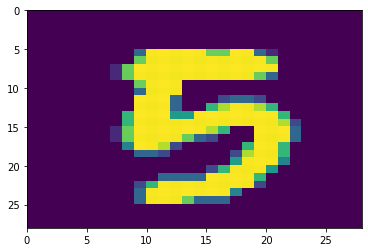

In [153]:
n = 244
print(training_set[n][1])
plt.pcolor(training_set[n][0].numpy().reshape((28,28)))
plt.gca().invert_yaxis()

# print(torch.argmax(model(training_set[0][0])))

In [154]:
output1 = 64
output2 = 32

MLP = nn.Sequential(
    nn.Linear(28 * 28, output1),
    nn.ReLU(),
    nn.Linear(output1, output2),
    nn.ReLU(),
    nn.Linear(output2, 10))

In [155]:
model, training_losses, training_accuracies, validation_accuracies, optimizer = train_multi_model(train_data=training_set, test_data=test_set, model=MLP,
                        optim="MegaSAM", batch_size=128, epochs=100, tracking=True, alpha=.2, lr_M=10, lr=.2)
                        

In [156]:
# print(model[0].weight.grad)
print(optimizer.M_param_groups[0]['params'][0].grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


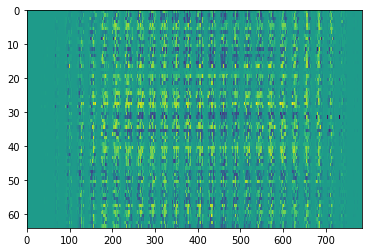

In [164]:
# f, axarr = plt.subplots(1, 2)
# axarr[0].imshow(optimizer.M_param_groups[0]['params'][0].view(28, 28))
# axarr[1].imshow(optimizer.M_param_groups[0]['params'][0].view(28, 28) == 0)
plt.pcolor(optimizer.M_param_groups[0]['params'][0].grad)
plt.gca().invert_yaxis()

In [158]:
# print(list(model[0].parameters()))

In [159]:
print(f"MegaSAM training accuracies: {training_accuracies}")
print(f"MegaSAM validation accuracies: {validation_accuracies}")

MegaSAM training accuracies: [0.8194000124931335, 0.9436333179473877, 0.9588500261306763, 0.9666500091552734, 0.972350001335144, 0.9760500192642212, 0.9786499738693237, 0.9812833070755005, 0.9831666946411133, 0.9849333167076111, 0.9857333302497864, 0.9879500269889832, 0.9884333610534668, 0.9899166822433472, 0.9904166460037231, 0.9914000034332275, 0.9923666715621948, 0.9929333329200745, 0.9936500191688538, 0.9940000176429749, 0.9943666458129883, 0.9955666661262512, 0.9957500100135803, 0.99631667137146, 0.9965500235557556, 0.9969333410263062, 0.9971666932106018, 0.9975500106811523, 0.9976166486740112, 0.9980833530426025, 0.9981833100318909, 0.9982666373252869, 0.9986166954040527, 0.9987499713897705, 0.9988499879837036, 0.9989666938781738, 0.9988999962806702, 0.9990666508674622, 0.9991000294685364, 0.9993833303451538, 0.9992166757583618, 0.9993500113487244, 0.9993500113487244, 0.9994666576385498, 0.9994666576385498, 0.9994333386421204, 0.9994666576385498, 0.9994000196456909, 0.99968332052

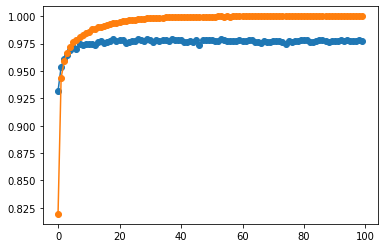

In [160]:
plt.plot(validation_accuracies, 'o-')
plt.plot(training_accuracies, 'o-')

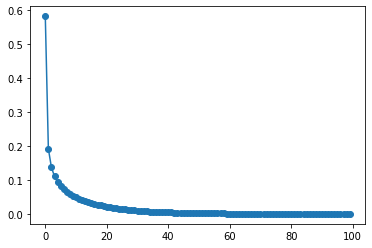

In [161]:
plt.plot(training_losses, 'o-')